In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [300]:
ms = pd.read_csv('data/predictors_of_multiple_sclerosis.csv')

dataset: https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis

In [301]:
ms.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [302]:
ms = ms.drop("Unnamed: 0", axis=1)

In [303]:
ms.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [304]:
ms.shape

(273, 19)

In [305]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   273 non-null    int64  
 1   Age                      273 non-null    int64  
 2   Schooling                272 non-null    float64
 3   Breastfeeding            273 non-null    int64  
 4   Varicella                273 non-null    int64  
 5   Initial_Symptom          272 non-null    float64
 6   Mono_or_Polysymptomatic  273 non-null    int64  
 7   Oligoclonal_Bands        273 non-null    int64  
 8   LLSSEP                   273 non-null    int64  
 9   ULSSEP                   273 non-null    int64  
 10  VEP                      273 non-null    int64  
 11  BAEP                     273 non-null    int64  
 12  Periventricular_MRI      273 non-null    int64  
 13  Cortical_MRI             273 non-null    int64  
 14  Infratentorial_MRI       2

In [306]:
ms.describe()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [307]:
ms['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

In [308]:
ms['Gender'].value_counts()

2    168
1    105
Name: Gender, dtype: int64

In [309]:
ms.isnull().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [310]:
ms.drop(['Initial_EDSS', 'Final_EDSS'], axis=1, inplace=True)
ms.isnull().sum()

Gender                     0
Age                        0
Schooling                  1
Breastfeeding              0
Varicella                  0
Initial_Symptom            1
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [311]:
ms.dropna(inplace=True)
ms.isnull().sum()

Gender                     0
Age                        0
Schooling                  0
Breastfeeding              0
Varicella                  0
Initial_Symptom            0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [312]:
ms.shape

(271, 17)

In [313]:
ms.corr()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
Gender,1.000000,0.077345,-0.009361,-0.092182,-0.035309,-0.140434,-0.022426,-0.168191,-0.160039,-0.160969,-0.154835,-0.152873,-0.189869,-0.126499,-0.173189,-0.001084,0.236554
Age,0.077345,1.000000,-0.161870,-0.057267,0.163503,0.109306,-0.014212,-0.004949,0.049615,0.083647,0.007923,0.208558,0.027445,0.080115,-0.047925,0.121135,-0.061160
Schooling,-0.009361,-0.161870,1.000000,-0.079924,-0.171167,0.012441,0.045075,0.009704,-0.025784,-0.070017,0.004125,0.061558,0.017461,0.036500,-0.062944,0.054406,-0.182408
Breastfeeding,-0.092182,-0.057267,-0.079924,1.000000,0.575915,0.020549,0.030693,0.006379,-0.065426,-0.099127,0.053860,-0.064866,-0.021676,-0.043585,-0.056015,-0.008628,0.134818
Varicella,-0.035309,0.163503,-0.171167,0.575915,1.000000,0.014679,-0.038664,-0.061155,-0.099022,-0.043307,0.067128,-0.033070,-0.089005,0.043774,-0.071450,-0.039379,0.159476
Initial_Symptom,-0.140434,0.109306,0.012441,0.020549,0.014679,1.000000,0.532276,0.117370,0.220882,0.258362,0.184624,0.144067,0.328273,0.005853,0.261559,0.245474,-0.386839
Mono_or_Polysymptomatic,-0.022426,-0.014212,0.045075,0.030693,-0.038664,0.532276,1.000000,0.063856,0.156650,0.078955,0.205074,0.092447,0.146566,0.031872,0.052434,0.160141,-0.046292
Oligoclonal_Bands,-0.168191,-0.004949,0.009704,0.006379,-0.061155,0.117370,0.063856,1.000000,-0.058656,-0.028627,0.080703,0.099590,0.102489,0.035713,0.019317,0.075364,-0.204665
LLSSEP,-0.160039,0.049615,-0.025784,-0.065426,-0.099022,0.220882,0.156650,-0.058656,1.000000,0.596690,0.393163,0.100788,0.185773,0.179586,0.122819,0.336790,-0.223993
ULSSEP,-0.160969,0.083647,-0.070017,-0.099127,-0.043307,0.258362,0.078955,-0.028627,0.596690,1.000000,0.347301,0.133831,0.215343,0.115022,0.148897,0.257688,-0.197502


**Dataset column descriptions**

ID: Patient identifier (int)

Age: Age of the patient (in years)

Schooling: time the patient spent in school (in years)

Gender: 1=male, 2=female

Breastfeeding: 1=yes, 2=no, 3=unknown

Varicella: 1=positive, 2=negative, 3=unknown

Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other

Mono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown

Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown

LLSSEP: 0=negative, 1=positive

ULSSEP:0=negative, 1=positive

VEP:0=negative, 1=positive

BAEP: 0=negative, 1=positive

Periventricular_MRI:0=negative, 1=positive

Cortical_MRI: 0=negative, 1=positive

Infratentorial_MRI:0=negative, 1=positive

Spinal_Cord_MRI: 0=negative, 1=positive

initial_EDSS:?

final_EDSS:?

Group: 1=CDMS, 2=non-CDMS

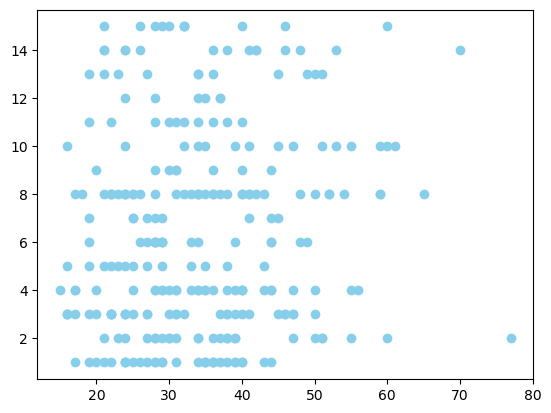

In [314]:
plt.scatter(x = ms['Age'], y = ms['Initial_Symptom'], color = 'skyblue')
plt.show()

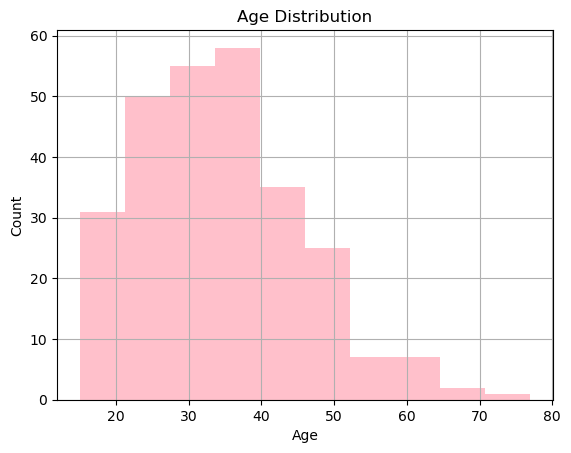

In [315]:
ms['Age'].hist(color = 'pink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

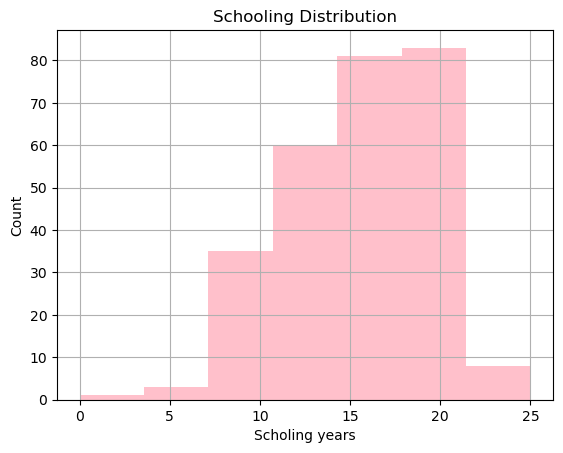

In [316]:
ms['Schooling'].hist(bins = 7, color = 'pink')
plt.xlabel('Scholing years')
plt.ylabel('Count')
plt.title('Schooling Distribution')
plt.show()

In [317]:
symptom_mapping = {
    1: 'Visual',
    2: 'Sensory',
    3: 'Motor',
    4: 'Other',
    5: 'Visual and Sensory',
    6: 'Visual and Motor',
    7: 'Visual and Other',
    8: 'Sensory and Motor',
    9: 'Sensory and Other',
    10: 'Motor and Other',
    11: 'Visual, Sensory, and Motor',
    12: 'Visual, Sensory, and Other',
    13: 'Visual, Motor, and Other',
    14: 'Sensory, Motor, and Other',
    15: 'Visual, Sensory, Motor, and Other'
}
ms2 = ms.copy()
ms2['Initial_Symptom_Names'] = ms2['Initial_Symptom'].map(symptom_mapping)

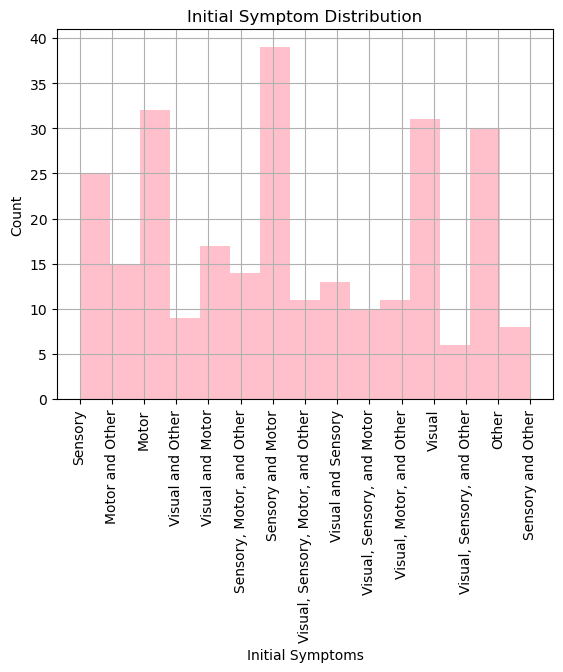

In [318]:
ms2['Initial_Symptom_Names'].hist(bins=15, color = 'pink')
plt.xticks(rotation='vertical') #x labels are vertical so that all labels are visible
plt.xlabel('Initial Symptoms')
plt.ylabel('Count')
plt.title('Initial Symptom Distribution')
plt.show()

<Axes: >

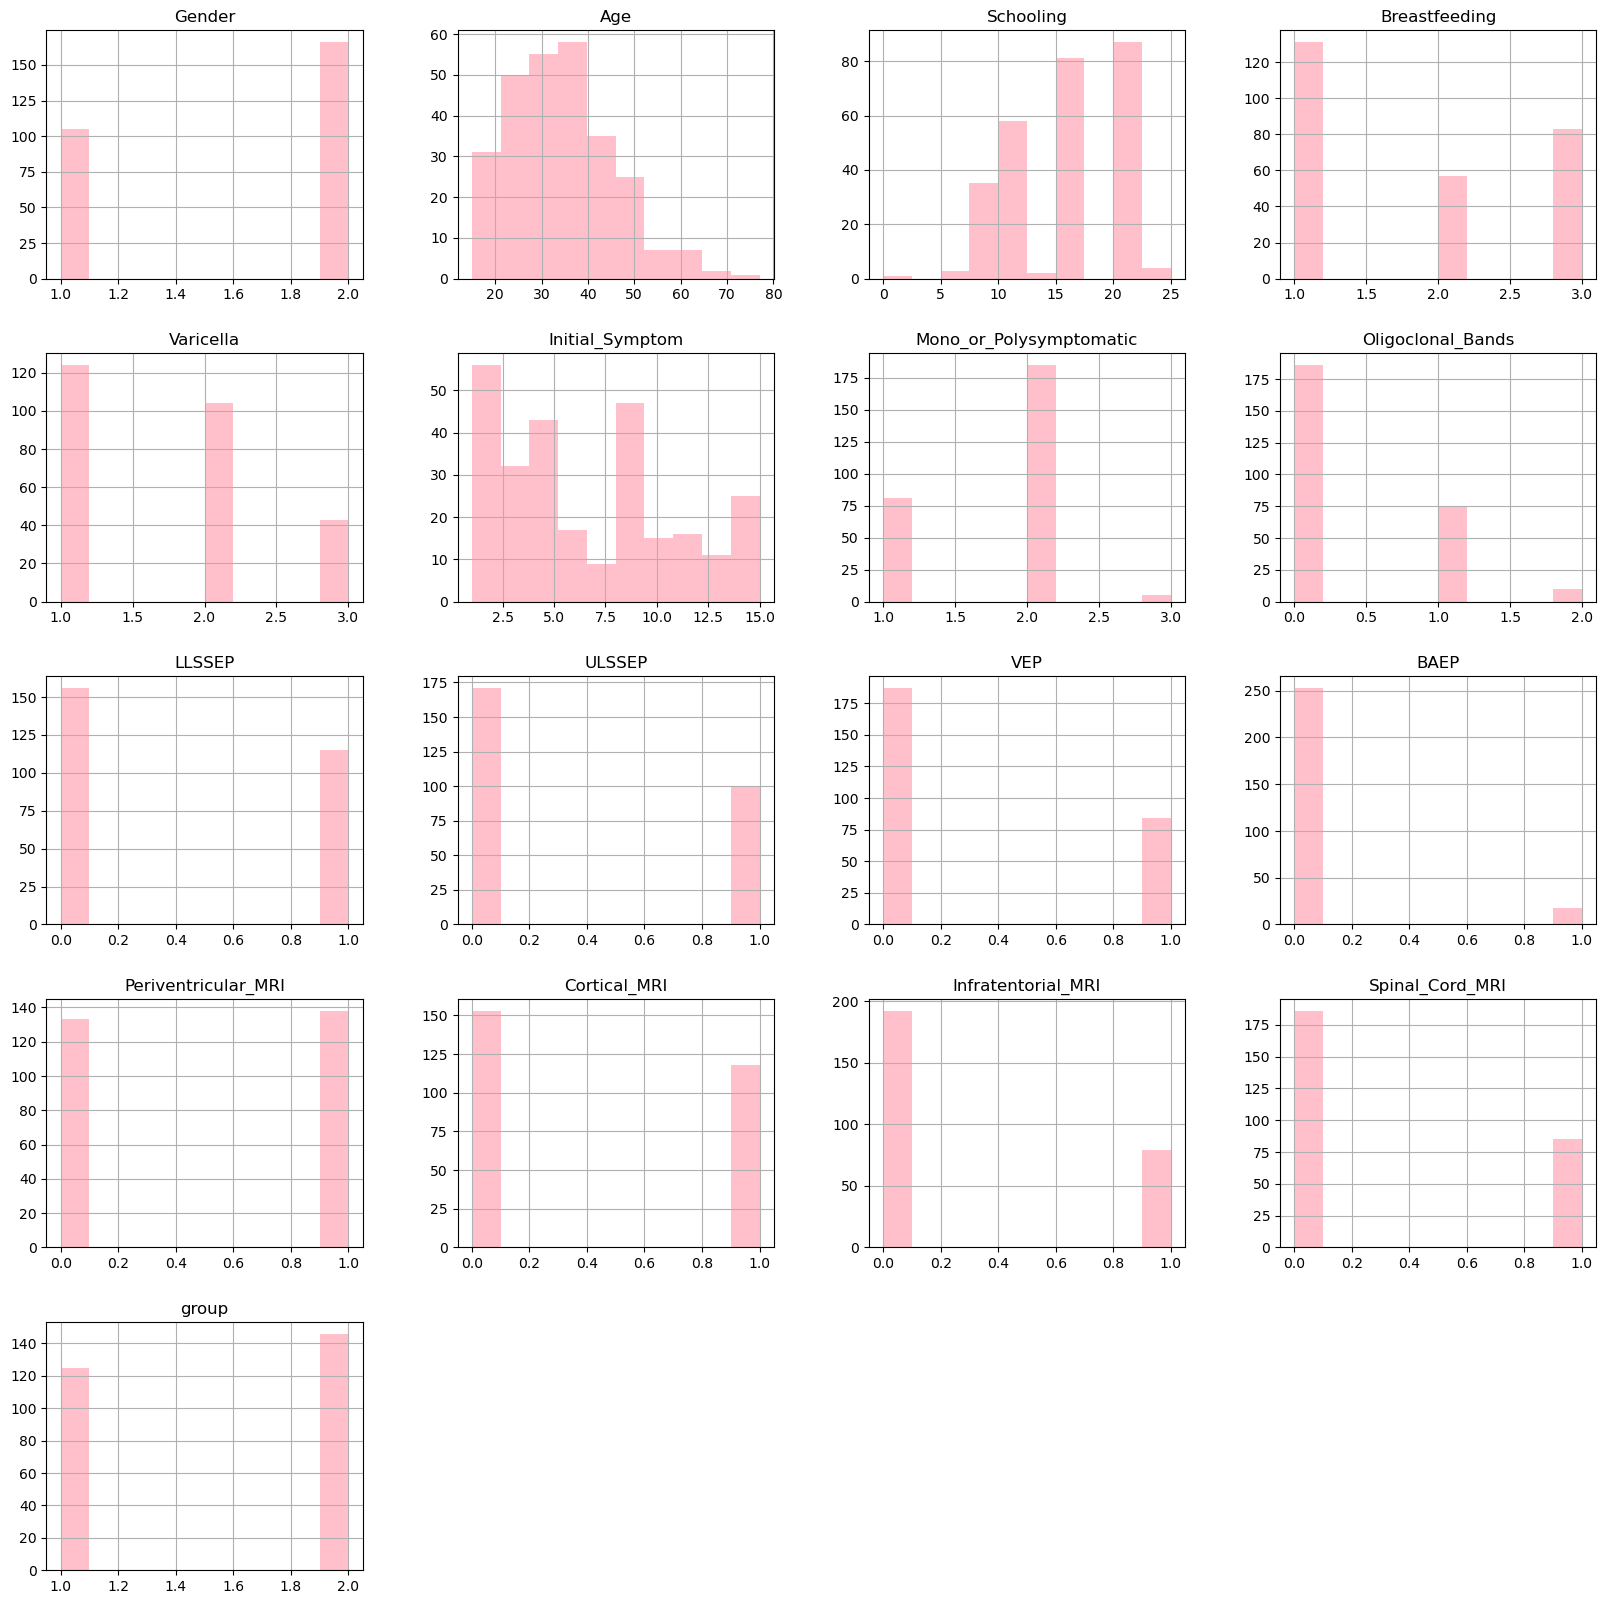

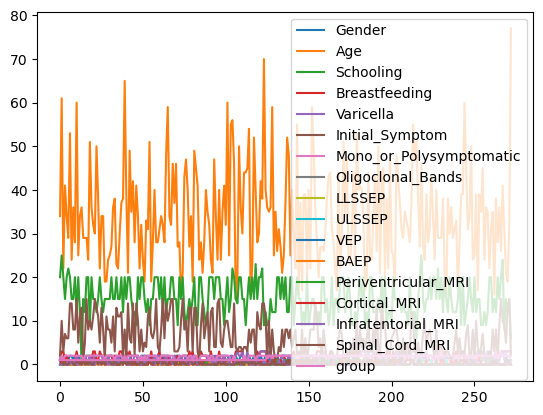

In [342]:
ms.hist(figsize = (20,20), color = 'pink')
ms.plot()

<Axes: >

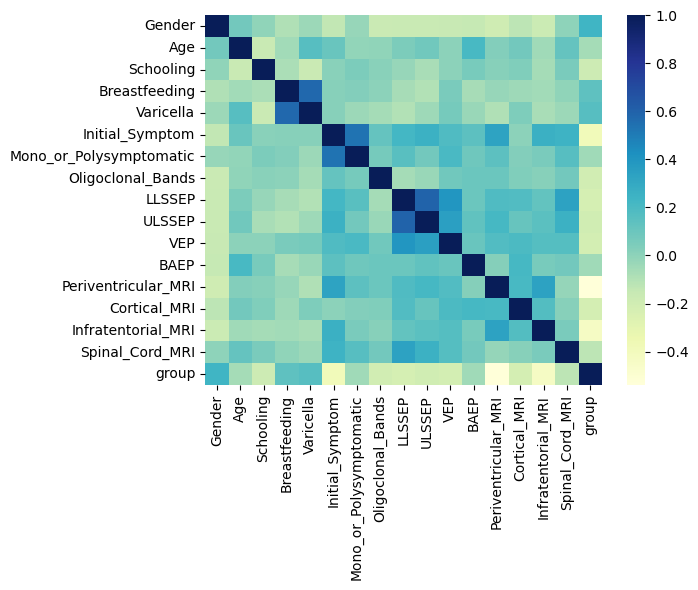

In [319]:
sns.heatmap(ms.corr(), cmap="YlGnBu")

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [321]:
X = ms.drop(columns=['group']) 
y = ms['group']

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [324]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [325]:
y_pred = knn.predict(X_test)

In [326]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [331]:
accuracy_final = 0
k_neighbors = 0
for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > accuracy_final:
        accuracy_final = 0 + accuracy
        k_neighbors = 0 + i
print ('Optimal value for k is: ', k_neighbors, '\nAccuracy score: ', accuracy_final)

Optimal value for k is:  4 
Accuracy score:  0.6727272727272727


In [332]:
from sklearn import cluster, datasets, preprocessing, metrics
from sklearn.metrics import pairwise_distances

In [334]:
#training and testing errors for a range of k

k_range = list(range(1, 50))
training_error = []
testing_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
#training error
    y_pred = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred)
    training_error.append(1 - training_accuracy)
    
#testing error
    y_pred = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred)
    testing_error.append(1 - testing_accuracy)

In [335]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
49,0.324074,0.381818
48,0.328704,0.363636
47,0.333333,0.381818
46,0.324074,0.345455
45,0.310185,0.363636


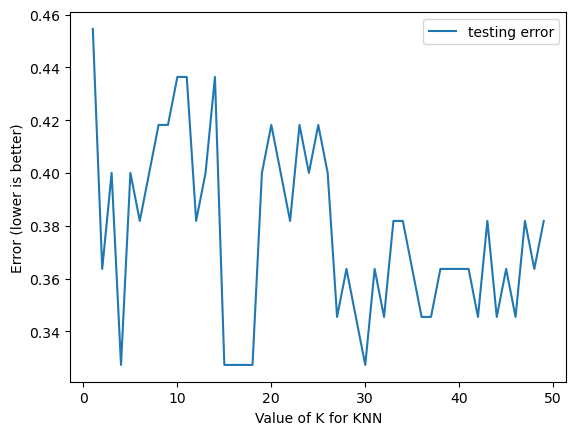

In [336]:
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

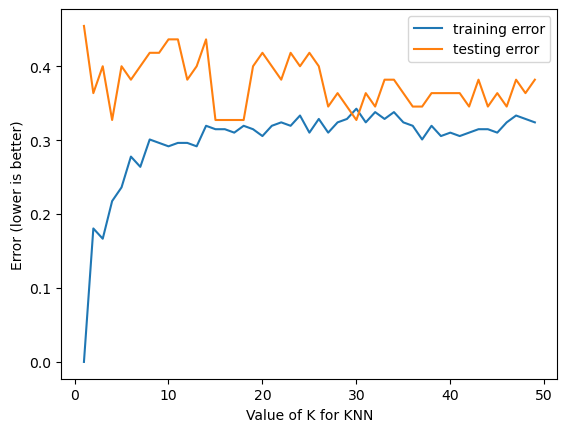

In [337]:
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

TypeError: Axes.scatter() missing 2 required positional arguments: 'x' and 'y'

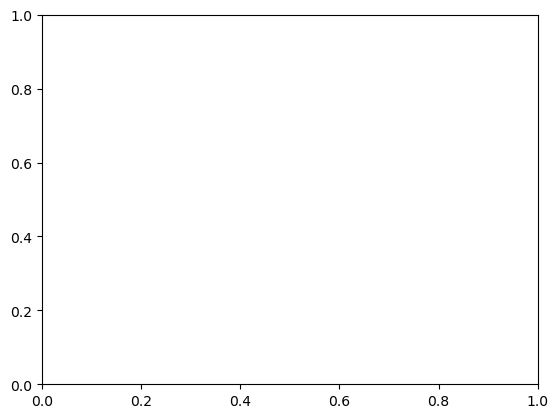

In [339]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.show()